<a href="https://colab.research.google.com/github/hakmin1015/PowerSystemEconomics/blob/main/etc/Practice/AirPassenger_auto_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA Practice 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/LoadForecasting/
!pwd

/content/drive/MyDrive/LoadForecasting
/content/drive/MyDrive/LoadForecasting


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.7 MB/s eta 0:00:00


<Axes: >

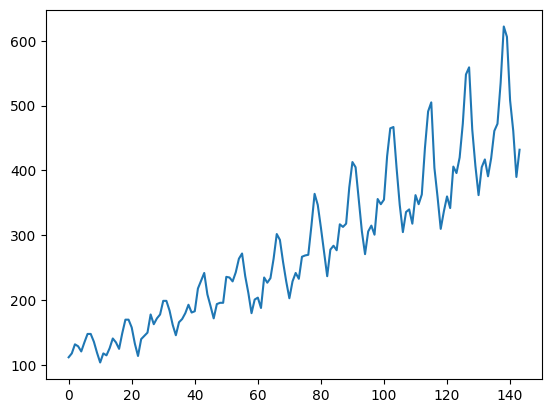

In [ ]:
#!pip install pmdarima

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from pmdarima.arima import auto_arima

df = pd.read_csv('AirPassengers.csv')
data = df['#Passengers']
data.plot()

<Axes: >

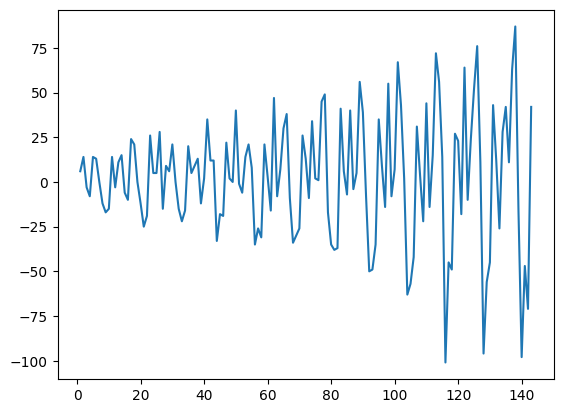

In [ ]:
diff = data.diff()
diff.plot()

In [ ]:
train, test = train_test_split(data, test_size=0.2, shuffle=False)

model = auto_arima(train, max_p=3, max_q=3, d=1,
                   seasonal=True, max_P=3, max_Q=3, D=1, m=12,
                   trace=True, error_action='ignore', suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.13 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=756.988, Time=0.14 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=758.826, Time=0.71 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=758.186, Time=0.91 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=756.959, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=758.922, Time=0.23 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=2.86 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=754.685, Time=4.83 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=758.869, Time=0.78 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=760.726, Time=1.75 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=3.44 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=756.686, Time=7.12 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=759.643, Time=1.96 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=7.86 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=756.688, Time=9.27 sec
 ARIMA(0,1,1)(0,1,0)[1

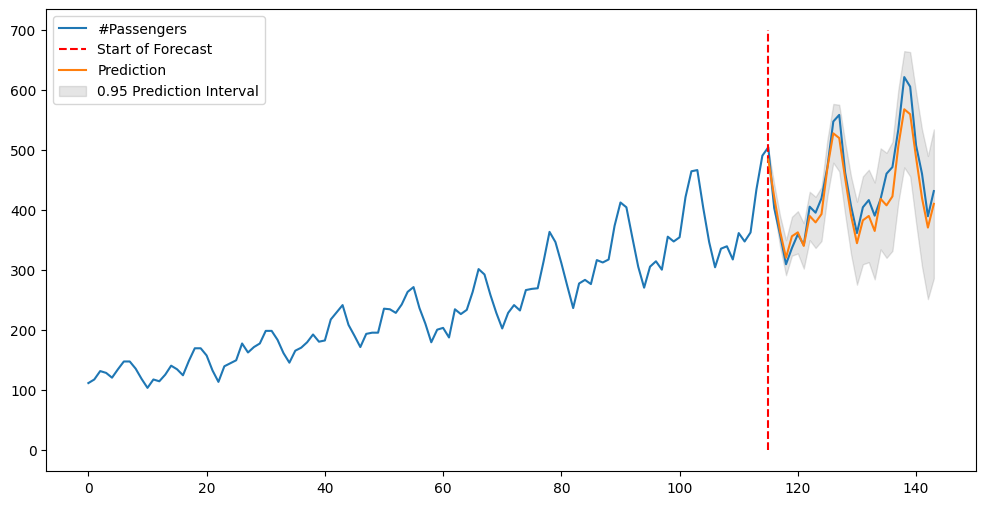

In [ ]:
pred = model.predict(len(test), return_conf_int=True)
pred_val = pred[0]
pred_ub = pred[1][:,0]
pred_lb = pred[1][:,1]
pred_idx = list(test.index)

fig, ax = plt.subplots(figsize=(12,6))
data.plot(ax=ax);
ax.vlines(pred_idx[0], 0, 700, linestyle='--', color='r', label='Start of Forecast');
ax.plot(pred_idx, pred_val, label='Prediction')
ax.fill_between(pred_idx, pred_lb, pred_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
plt.legend()
plt.show()

<Axes: >

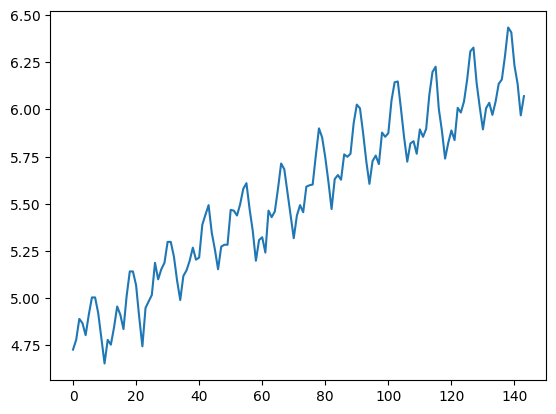

In [ ]:
data_ln = np.log1p(df['#Passengers'])
data_ln.plot()

In [ ]:
train, test = train_test_split(data_ln, test_size=0.2, shuffle=False)

model = auto_arima(train, max_p=3, max_q=3, d=1,
                   seasonal=True, max_P=3, max_Q=3, D=1, m=12,
                   trace=True, error_action='ignore', suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-336.905, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-365.667, Time=0.51 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-363.669, Time=1.86 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=-362.388, Time=2.38 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-355.988, Time=0.44 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-363.669, Time=0.51 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=-361.715, Time=1.19 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=-360.620, Time=4.21 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-362.456, Time=0.53 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=-362.300, Time=2.05 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=-360.264, Time=2.89 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=-358.286, Time=3.10 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=-361.950, Time=1.67 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=-360.298, Time=3.35 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=-358.300, Time=3.99

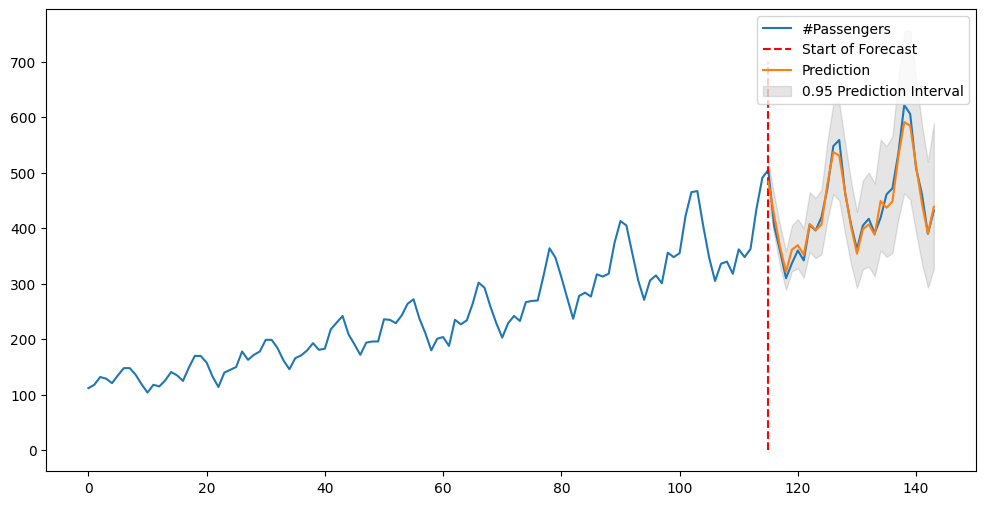

In [ ]:
pred = model.predict(len(test), return_conf_int=True)
pred_val = np.expm1(pred[0])
pred_ub = np.expm1(pred[1][:,0])
pred_lb = np.expm1(pred[1][:,1])
pred_idx = list(test.index)

fig, ax = plt.subplots(figsize=(12,6))
data.plot(ax=ax);
ax.vlines(pred_idx[0], 0, 700, linestyle='--', color='r', label='Start of Forecast');
ax.plot(pred_idx, pred_val, label='Prediction')
ax.fill_between(pred_idx, pred_lb, pred_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
plt.legend()
plt.show()